# TMVN Sampling
Comparing the TMVN sampler to other samplers...

In [1]:
import hopsy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A = np.array([[-1., 0.],[ 0.,-1.],[ 1. , 0.],[ 0. , 1.]
              # ,[ 1., -1.],[ 1., -1.],[ 1., -1.],[ 1., -1.]
             ])
b = np.array([[ 0., 0., 5., 5.,
               # 0., 0., 0., -0.
              ]]).T
mean = np.array([[0.6, 1.0]]).T

print(mean)
print(b-A.dot(mean))
# print(b-A*mean)

[[0.6]
 [1. ]]
[[0.6]
 [1. ]
 [4.4]
 [4. ]]


In [3]:
model = lambda dim: hopsy.Gaussian(dim)
dims = np.array([2])
# Problem = lambda dim: hopsy.add_box_constraints(hopsy.Problem(np.ones((1, dim)), 5000 * np.ones(1), model(dim)), -10, 100)
Problem = lambda dim: hopsy.add_box_constraints(
    hopsy.Problem(np.array([[1, 0], [0, 1]]),
                  1000*np.ones(2), 
                  model(dim)), -10, 10)

proposals = [
    # hopsy.GaussianHitAndRunProposal,
    hopsy.GaussianProposal,
    hopsy.TruncatedGaussianProposal,
    hopsy.UniformCoordinateHitAndRunProposal,
    hopsy.CSmMALAProposal,
    hopsy.BilliardMALAProposal,
    # hopsy.DikinWalkProposal,
]

accrates = np.zeros((len(dims), len(proposals)))

chains = {}
for i, dim in enumerate(dims):
    chains[dim] = {}
    for k, Proposal in enumerate(proposals):
        problem = Problem(dim)
        mc = hopsy.MarkovChain(problem, Proposal, starting_point=[.001]*dim)
        rng = hopsy.RandomNumberGenerator(seed=42)

        accrate, _ = hopsy.sample(mc, rng, 250_000)
        chains[dim][Proposal] = _

        accrates[i, k] = accrate[0]


Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-30


In [4]:
print(Problem(dim).A)
print(Problem(dim).b)

[[-1.  0.]
 [ 0. -1.]
 [ 1.  0.]
 [ 0.  1.]]
[10. 10. 10. 10.]


<class 'hopsy.core.GaussianProposal'>
<class 'hopsy.core.GaussianProposal'>
0.003717328432895571
0.9993054829707392
<class 'hopsy.core.TruncatedGaussianProposal'>
<class 'hopsy.core.TruncatedGaussianProposal'>
-0.0007920047053880569
0.9989467812622056
<class 'hopsy.core.UniformCoordinateHitAndRunProposal'>
<class 'hopsy.core.UniformCoordinateHitAndRunProposal'>
0.00407619332020888
0.9984964219897617
<class 'hopsy.core.CSmMALAProposal'>
<class 'hopsy.core.CSmMALAProposal'>
0.004213253764616939
0.9990148075099534
<class 'hopsy.core.BilliardMALAProposal'>
<class 'hopsy.core.BilliardMALAProposal'>
0.0035644886495046573
1.0030206724358808


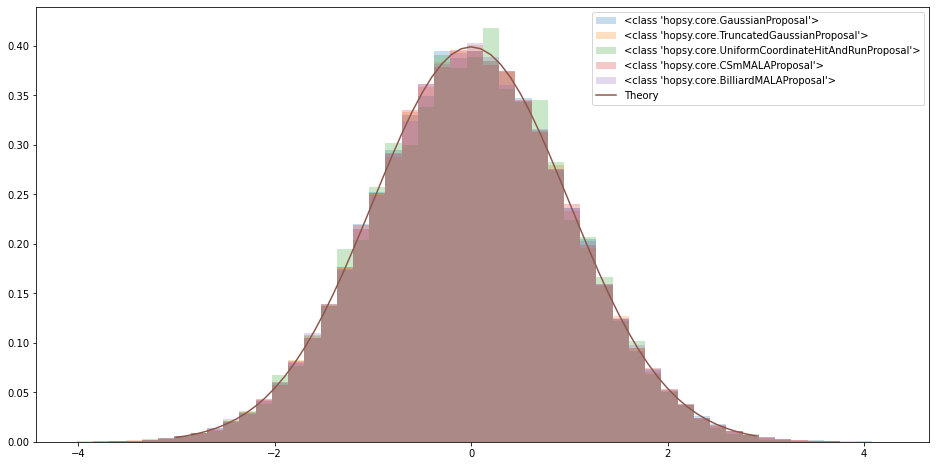

In [5]:
for dim in dims:
    plt.figure(figsize=(16, 8))
    bins = None
    for chain, samples in chains[dim].items():
        print(str(chain))
        
        # print(samples[:,:,1].shape)
        # print(samples[:,:,1])
        # plt.plot(samples[:,:,0].flatten())
        # plt.hist(samples[:,:,0].flatten())
        # plt.hist(samples[:,:,1].flatten())
        # plt.scatter(samples[:,:,0].flatten(), samples[:,:,1].flatten())
        # plt.hist(samples[:,:,0].flatten(), density=True, histtype='step')
        if bins is None:
            _, bins, _ = plt.hist(samples[:,:,0].flatten(), bins=50, density=True, histtype='stepfilled', label=str(chain), alpha=0.25)
        else:
            plt.hist(samples[:,:,0].flatten(), bins=bins, density=True, histtype='stepfilled', label=str(chain), alpha=0.25)
        print(str(chain))
        print(np.mean(samples[:,:,0]))
        print(np.std(samples[:,:,0], ddof=1))
        xs = np.arange(-3, 3, 0.1)
    plt.plot(xs, [np.exp(-hopsy.Gaussian(1).compute_negative_log_likelihood(np.array([[x]]))) for x in xs], label='Theory')
        # , samples[:,:,1].flatten())
    plt.legend()
        # plt.plot(samples[:,:,1].flatten())